# ***Grafo***

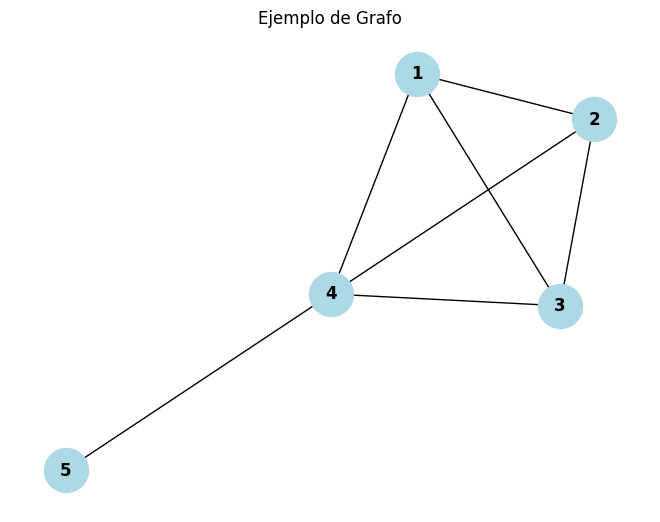

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)
G.add_edge(4, 5)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title("Ejemplo de Grafo")
plt.show()


# ***Formación paso a paso de un grafo***

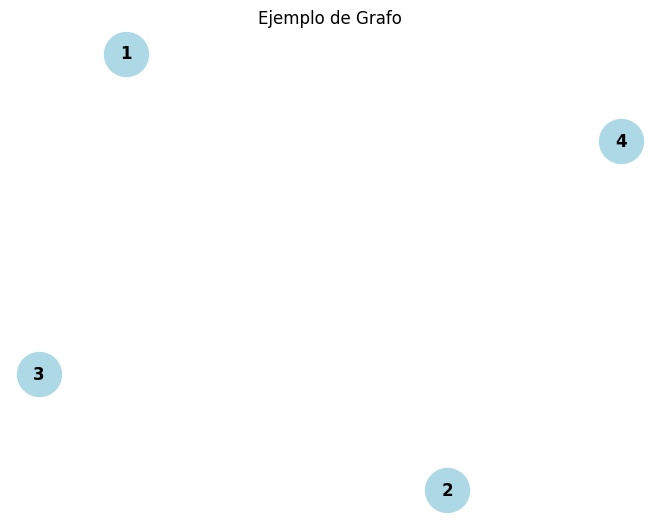

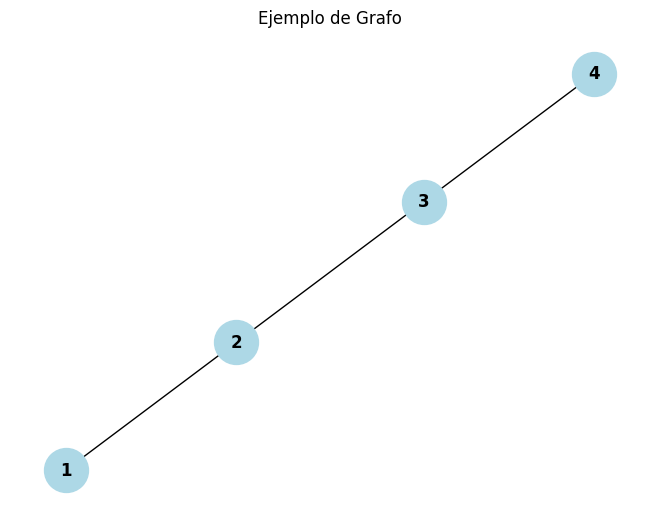

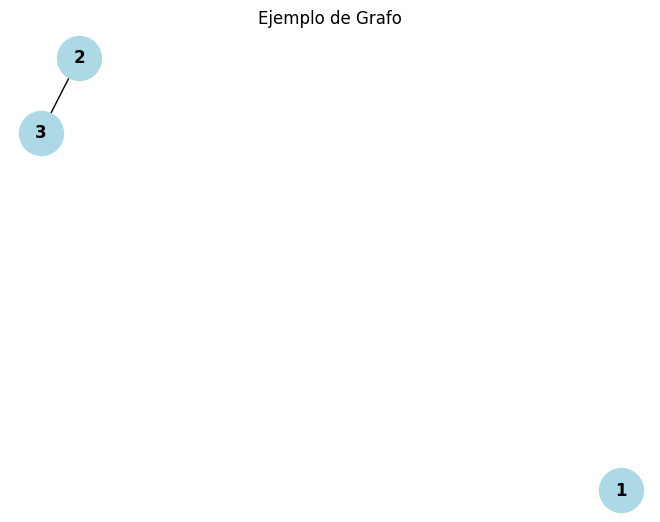

In [47]:
import networkx as nx

G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3, 4])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title("Ejemplo de Grafo")
plt.show()

G.add_edge(1, 2)
G.add_edges_from([(2, 3), (3, 4)])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title("Ejemplo de Grafo")
plt.show()

G.remove_node(4)
G.remove_edge(1, 2)

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title("Ejemplo de Grafo")
plt.show()


# ***Numero de nodos y aristas***

In [6]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 3
Número de aristas: 1
Vecinos de 3: [2]


# ***Número de vecinos***

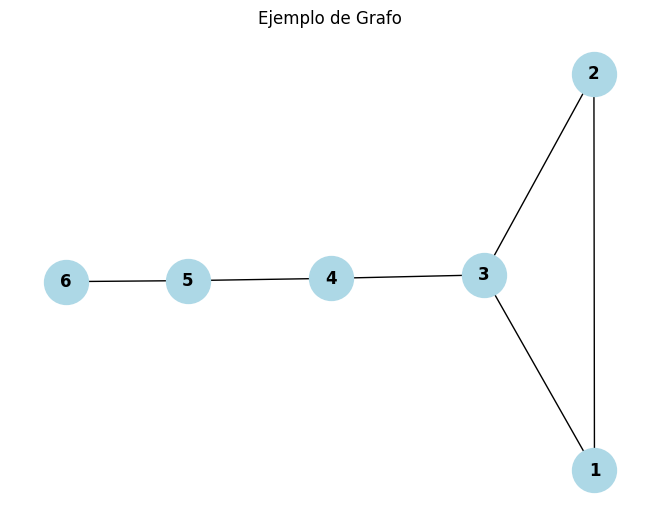

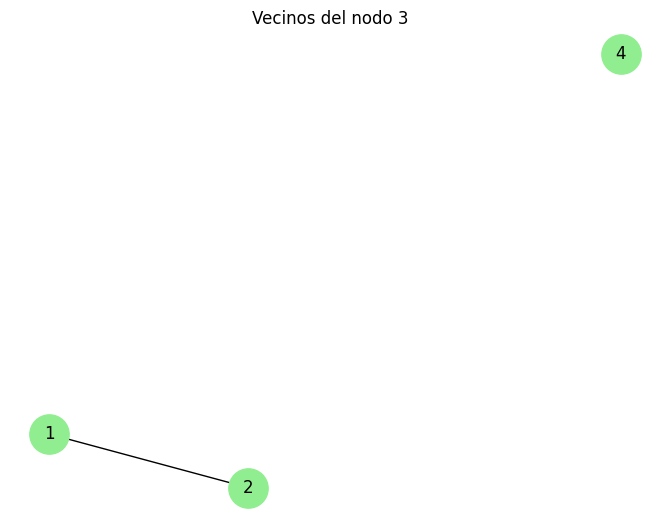

In [54]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6)])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
plt.title("Ejemplo de Grafo")
plt.show()

neighbors_of_3 = list(G.neighbors(3))
subgraph = G.subgraph(neighbors_of_3)

nx.draw(subgraph, with_labels=True, node_color='lightgreen', node_size=800, font_size=12)
plt.title("Vecinos del nodo 3")
plt.show()


# ***Algoritmo de Dijkstra***

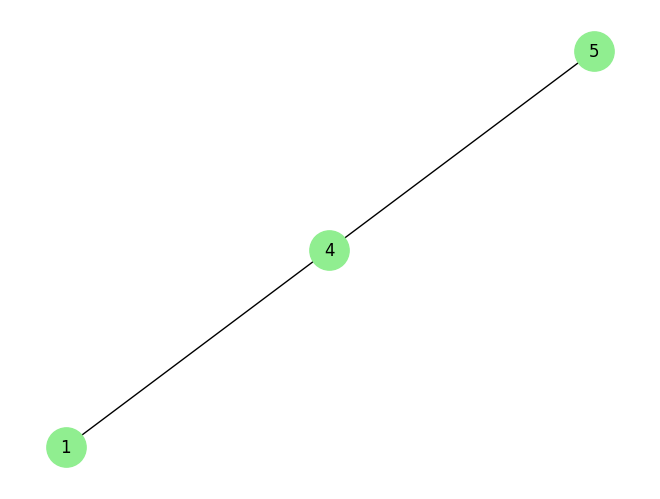

In [22]:
G = nx.Graph()

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)
G.add_edge(4, 5)
G.add_edge(2, 5)
shortest_path = nx.shortest_path(G, source=1, target=5)

shortest_path_graph = G.subgraph(shortest_path)

nx.draw(shortest_path_graph, with_labels=True, node_color='lightgreen', node_size=800, font_size=12)
plt.show()


# ***Algoritmo de Kruskal***

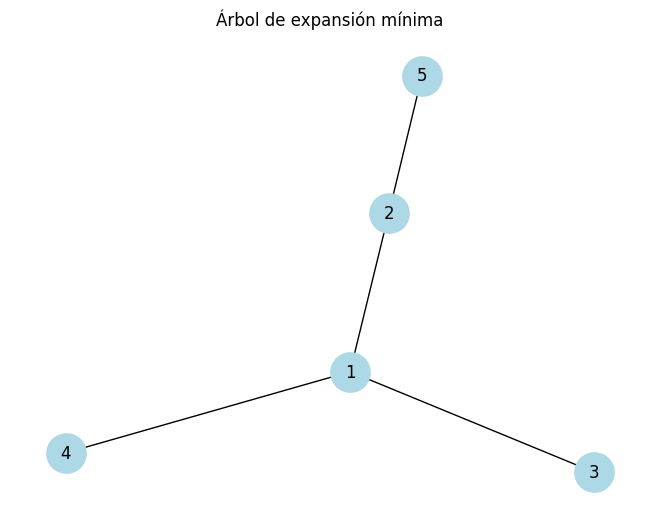

In [23]:
min_spanning_tree = nx.minimum_spanning_tree(G)
nx.draw(min_spanning_tree, with_labels=True, node_color='lightblue', node_size=800, font_size=12)
plt.title("Árbol de expansión mínima")
plt.show()


# ***Algoritmo de PageRank***

Text(0.5, 1.0, 'Importancia de los nodos (PageRank)')

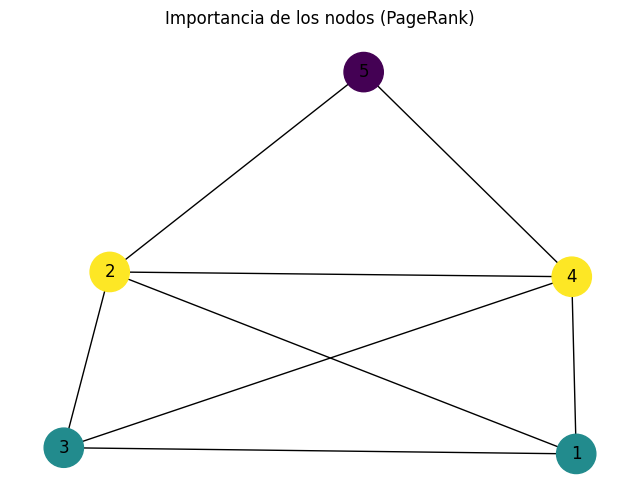

In [24]:
pagerank_scores = nx.pagerank(G)

node_colors = [pagerank_scores[node] for node in G.nodes()]

plt.figure(figsize=(8, 6))
mappable = plt.scatter([], [], c=[], cmap=plt.cm.viridis)

nx.draw(G, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=800, font_size=12)
plt.title("Importancia de los nodos (PageRank)")

# ***Ciclos***

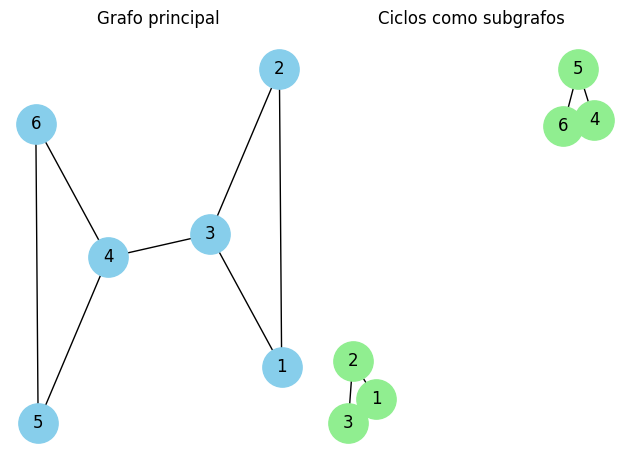

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 6), (6, 4)])

cycles = list(nx.simple_cycles(G))

cycle_graph = nx.Graph()

for cycle in cycles:
    cycle_graph.add_nodes_from(cycle)
    edges = list(zip(cycle, cycle[1:]))
    edges.append((cycle[-1], cycle[0]))
    cycle_graph.add_edges_from(edges)

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=12)
plt.title("Grafo principal")

plt.subplot(122)
nx.draw(cycle_graph, with_labels=True, node_color='lightgreen', node_size=800, font_size=12)
plt.title("Ciclos como subgrafos")

plt.tight_layout()
plt.show()


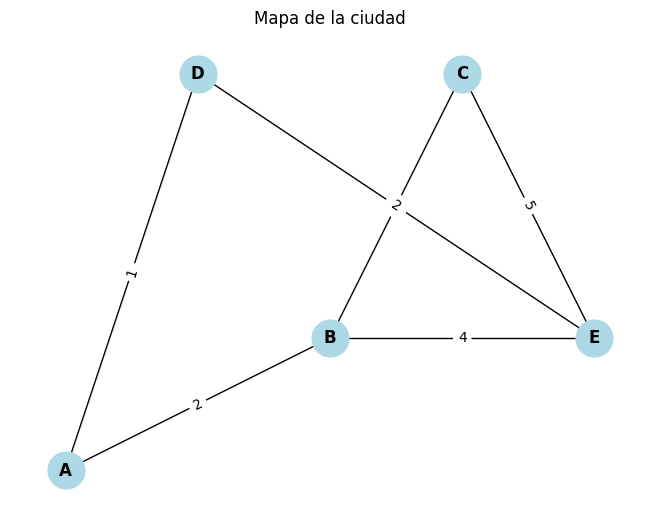

Ruta más corta entre A y C: ['A', 'B', 'C']


In [57]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("A", pos=(0, 0))
G.add_node("B", pos=(2, 1))
G.add_node("C", pos=(3, 3))
G.add_node("D", pos=(1, 3))
G.add_node("E", pos=(4, 1))

G.add_edge("A", "B", weight=2)
G.add_edge("A", "D", weight=1)
G.add_edge("B", "C", weight=3)
G.add_edge("B", "E", weight=4)
G.add_edge("C", "E", weight=5)
G.add_edge("D", "E", weight=2)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Mapa de la ciudad")
plt.show()

shortest_path = nx.shortest_path(G, source="A", target="C", weight="weight")
print("Ruta más corta entre A y C:", shortest_path)


In [59]:
# Calcular la ruta más corta entre dos ubicaciones utilizando A*
shortest_path_astar = nx.astar_path(G, source="A", target="C", heuristic=None, weight="weight")
print("Ruta más corta entre A y C (A*):", shortest_path_astar)


Ruta más corta entre A y C (A*): ['A', 'B', 'C']


In [60]:
shortest_path_time = nx.shortest_path(G, source="A", target="C", weight="weight")
total_travel_time = nx.shortest_path_length(G, source="A", target="C", weight="weight")
print("Ruta que minimiza el tiempo de viaje:", shortest_path_time)
print("Tiempo total de viaje:", total_travel_time)


Ruta que minimiza el tiempo de viaje: ['A', 'B', 'C']
Tiempo total de viaje: 5


1.   Crea un grafo que represente la red de transporte urbano de la ciudad. Cada nodo del grafo representará una ubicación, como una estación de tren, una parada de autobús, etc. Las aristas del grafo representarán las conexiones entre estas ubicaciones y estarán ponderadas por la distancia entre ellas.

nodos = ["Estación de tren A", "Estación de tren B", "Estación de tren C", "Parada de autobús 1", "Parada de autobús 2", "Parada de autobús 3", "Aeropuerto", "Centro comercial 1", "Centro comercial 2", "Hospital", "Escuela 1", "Escuela 2", "Parque 1", "Parque 2", "Biblioteca", "Museo", "Teatro", "Estadio", "Oficina de correos", "Restaurante 1", "Restaurante 2", "Cafetería 1", "Cafetería 2", "Hotel 1", "Hotel 2", "Banco 1", "Banco 2", "Farmacia", "Supermercado"]


conexiones = [("Estación de tren A", "Estación de tren B", {"distancia": 5}), ("Estación de tren A", "Parada de autobús 1", {"distancia": 2}), ("Estación de tren A", "Hospital", {"distancia": 3}), ("Parada de autobús 1", "Parada de autobús 2", {"distancia": 1}), ("Parada de autobús 1", "Centro comercial 1", {"distancia": 4}), ("Centro comercial 1", "Restaurante 1", {"distancia": 2})]


2.   Implementa un algoritmo de búsqueda de caminos (como Dijkstra o A*) para encontrar las rutas óptimas entre diferentes ubicaciones en la ciudad. Los usuarios deben poder especificar su ubicación actual y su destino deseado, y el sistema debe devolver la ruta óptima para llegar allí.